In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc

In [3]:
#  coefficient quantization matrix
quantization = [[16, 11, 5, 5, 5, 5, 5, 5],
                [5, 5, 5, 5, 5, 5, 5, 5],
                [5, 5, 5, 5, 5, 5, 5, 5],
                [5, 5, 5, 5, 5, 5, 5, 5],
                [5, 5, 5, 5, 5, 5, 5, 5],
                [5, 5, 5, 5, 5, 5, 5, 5],
                [5, 5, 5, 5, 5, 5, 5, 5],
                [5, 5, 5, 5, 5, 5, 5, 5]]

In [4]:
# Forward DCT (8 × 8）
# The image need to be divided into 8×8 blocks firstly, and then transform each image subblock into DCT domain.
# For each image subblock in DCT domain, the coefficient in the location (0, 0) is the DC coefficient, others are AC coefficients.

def dct(img):
    img_data = img.astype(float)
    m, n = img_data.shape
    img_dct = np.zeros(img.shape)
    x_batchsize = int(m/8)
    y_batchsize = int(n/8)
    print ('m = ', m)
    print ('n = ', n)
    print (x_batchsize)
    print (y_batchsize)
    
    lis_dct = []
    x = 0
    F = 0
    lis_F = []
    TF = 0
    lis_selected = []

    for i in range(0,x_batchsize):
        for j in range(0,y_batchsize):
            window_x_s = i * 8
            window_x = (i+1) * 8
            window_y_s = j * 8
            window_y = (j+1) * 8
            img_dct[window_x_s:window_x, window_y_s:window_y] = cv2.dct(img_data[window_x_s:window_x,window_y_s:window_y]) / quantization
            lis_dct = cv2.dct(img_data[window_x_s:window_x,window_y_s:window_y]) / quantization
            y = 0
            sum_coeff = 0
            for l in lis_dct:
                for k in l:
                    if y == 0:
                        y += 1
                        continue
                    else:
                        y += 1
                        sum_coeff += (k * k)
#             print ('sum_coeff = ', sum_coeff)
            F = sum_coeff/64
            # Indexes of selected blocks inserted in a list, useful while traversing later
            if F < TF:
                lis_selected.append((i, j))
            lis_F.append(F)
            if x < 5:
                print (F)
                x += 1
#                 print ('y = ', y)

#             if x < 1:
#                 print (img_data[window_x_s:window_x,window_y_s:window_y])
#                 print (cv2.dct(img_data[window_x_s:window_x,window_y_s:window_y]) / quantization)
#                 x = x + 1

    print (lis_F)
    return img_dct

m =  3456
n =  4608
432
576
1.4281249999999983
1.4937402343750013
0.8524999999999987
1.7790234375000038
0.5556152343750024
[1.4281249999999983, 1.4937402343750013, 0.8524999999999987, 1.7790234375000038, 0.5556152343750024, 0.8227734374999982, 0.7683984374999987, 0.35545898437500056, 0.4762109375000019, 0.8156152343749993, 0.8100000000000006, 0.835, 0.8585937499999973, 1.328583984375002, 1.2302246093749962, 0.6706933593750022, 2.216875000000005, 0.43312499999999876, 0.6456152343750008, 0.8079589843750002, 0.539365234375002, 0.813271484374999, 2.214960937499999, 1.2699902343750002, 1.273896484375003, 1.0627246093749987, 0.5965527343750004, 0.15108398437499984, 0.31125000000000047, 0.770068359374999, 0.8150000000000007, 0.5803027343749988, 0.502099609375002, 1.2321777343749993, 0.40319335937500117, 1.9112500000000003, 0.9028027343750007, 0.3293359375000001, 0.534052734375003, 1.165625, 0.7890527343750003, 0.6301464843750012, 0.9719433593749982, 2.6503808593750016, 0.7956933593749985, 0.3

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

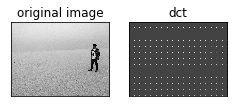

In [5]:
img = cv2.imread('nk.jpeg', 0)

# DCT
img_dct = dct(img)
# print (img_dct[0][0], img_dct[0][1])
# print (img_dct[0][8], img_dct[0][9])
# print (img_dct[0][16], img_dct[0][17])
# print (img_dct[0][24], img_dct[0][25])
# print (img_dct.shape)


# m, n = img_data.shape
# img_dct = np.zeros(img.shape)
# x_batchsize = int(m/8)
# y_batchsize = int(n/8)

# for i in range(0,x_batchsize):
#     for j in range(0,y_batchsize):
#         window_x_s = i * 8
#         window_x = (i+1) * 8
#         window_y_s = j * 8
#         window_y = (j+1) * 8
        

plt.subplot(131)
plt.imshow(img, 'gray')
plt.title('original image')
plt.xticks([]), plt.yticks([])

plt.subplot(132)
plt.imshow(img_dct, 'gray')
plt.title('dct')
plt.xticks([]), plt.yticks([])

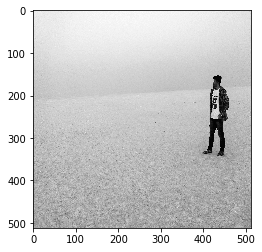

In [3]:
img = cv2.imread('nk.jpeg', 0)#Read different images
img = cv2.resize(img, (512, 512)) 
plt.imshow(img, 'gray')


In [4]:
# hist() function
# https://www.bogotobogo.com/python/OpenCV_Python/python_opencv3_image_histogram_calcHist.php


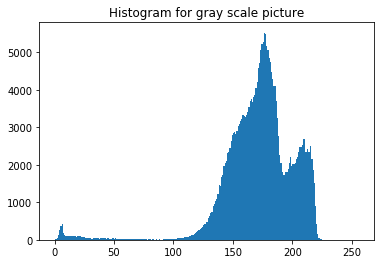

In [5]:
# hist = cv2.calcHist([img],[0],None,[256],[0,256])
hist,bins = np.histogram(img,256,[0,256])
a = plt.hist(img.ravel(),256,[0,256])
plt.title('Histogram for gray scale picture')
plt.show()

In [6]:
hist = list(filter(lambda a: a != 0, hist))
print(len(hist))

227
